# 전처리 2
- 아파트 실거래가 관련 변수 추가
## 1. 시각화
- 파생변수 데이터 시각화
- 상관관계 

## 2. 전처리
- 이상치 제거
- 원핫인코딩 
- 평당가 파생변수 생성
- 로그변환
- 스케일링

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)
warnings.filterwarnings(action='ignore')

# 데이터 불러오기

In [58]:
data = pd.read_csv('../data/apt_indicator.csv')
data

,Unnamed: 0,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,소비심리지수,아파트 매매 실거래 가격 지수,기준금리,GDP 성장률,apartment_id,recent_price,recent_jeonse,transaction_cnt,age,cluster
0,0,TRAIN_0320,서울특별시 강남구 대치동,670,동부센트레빌,145.83,201401,2,180000.0,16,2005,train,2014-01-02,112.6,66.6,2.5,0.9,20,180000.0,99000.0,25.0,9,3.0
1,1,TRAIN_0699,서울특별시 강남구 대치동,986-14,하이캐슬,84.06,201401,2,68000.0,5,2008,train,2014-01-02,112.6,66.6,2.5,0.9,58,68000.0,37400.0,1.0,6,1.0
2,2,TRAIN_0705,서울특별시 강남구 대치동,511,한보미도맨션1,161.36,201401,4,155000.0,5,1983,train,2014-01-04,112.6,66.6,2.5,0.9,60,155000.0,85250.0,24.0,31,3.0
3,3,TRAIN_0660,서울특별시 강남구 대치동,891-6,테헤란로대우아이빌(891-6),33.11,201401,4,27000.0,20,2004,train,2014-01-04,112.6,66.6,2.5,0.9,49,27000.0,14850.0,6.0,10,0.0
4,4,TRAIN_0102,서울특별시 강남구 대치동,891-28,대치동우정에쉐르1,59.98,201401,4,37400.0,6,2004,train,2014-01-04,112.6,66.6,2.5,0.9,6,37400.0,20570.0,4.0,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6084,6084,TEST_0161,서울특별시 강남구 대치동,902,포스코더샵,139.54,202306,23,NaN,16,2004,test,2023-06-23,103.7,99.1,3.5,0.3,50,290000.0,178500.0,2.0,19,2.0
6085,6085,TEST_0194,서울특별시 강남구 대치동,511,한보미도맨션2,126.33,202306,23,NaN,12,1985,test,2023-06-23,103.7,99.1,3.5,0.3,61,380000.0,135000.0,7.0,38,3.0
6086,6086,TEST_0045,서울특별시 강남구 대치동,63,"대치우성아파트1동,2동,3동,5동,6동,7동",84.69,202306,24,NaN,12,1984,test,2023-06-24,103.7,99.1,3.5,0.3,11,250000.0,85000.0,1.0,39,2.0
6087,6087,TEST_0013,서울특별시 강남구 대치동,500,개포우성2,84.69,202306,24,NaN,1,1984,test,2023-06-24,103.7,99.1,3.5,0.3,1,289000.0,90000.0,1.0,39,3.0


In [59]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [60]:
data.dtypes

id                         object
sigungu                    object
jibun                      object
apt_name                   object
exclusive_use_area        float64
transaction_year_month      int64
transaction_day             int64
transaction_real_price    float64
floor                       int64
year_of_completion          int64
train_test                 object
transaction_date           object
소비심리지수                    float64
아파트 매매 실거래 가격 지수          float64
기준금리                      float64
GDP 성장률                   float64
apartment_id                int64
recent_price              float64
recent_jeonse             float64
transaction_cnt           float64
age                         int64
cluster                   float64
dtype: object

In [61]:
train = data[data['train_test'] == 'train']
train.sample()

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,소비심리지수,아파트 매매 실거래 가격 지수,기준금리,GDP 성장률,apartment_id,recent_price,recent_jeonse,transaction_cnt,age,cluster
965,TRAIN_1323,서울특별시 강남구 대치동,316,은마,76.79,201502,16,89000.0,9,1979,train,2015-02-16,133.9,69.2,2.0,0.5,46,88500.0,35000.0,58.0,36,2.0


In [62]:
lst_col = train.columns
lst_col

Index(['id', 'sigungu', 'jibun', 'apt_name', 'exclusive_use_area',
       'transaction_year_month', 'transaction_day', 'transaction_real_price',
       'floor', 'year_of_completion', 'train_test', 'transaction_date',
       '소비심리지수', '아파트 매매 실거래 가격 지수', '기준금리', 'GDP 성장률', 'apartment_id',
       'recent_price', 'recent_jeonse', 'transaction_cnt', 'age', 'cluster'],
      dtype='object')

In [63]:
col_lst = ['exclusive_use_area',
       'floor', 'year_of_completion',
       '소비심리지수', '아파트 매매 실거래 가격 지수', '기준금리', 'GDP 성장률', 
       'recent_price', 'recent_jeonse','transaction_cnt','age', 'cluster']

In [64]:
sns.set(font_scale = 3)

# 시각화
## 변수별 분포
- 가격, 경제지표 등 여러 변수의 범위가 달라 스케일링이 필요할 것으로 보임

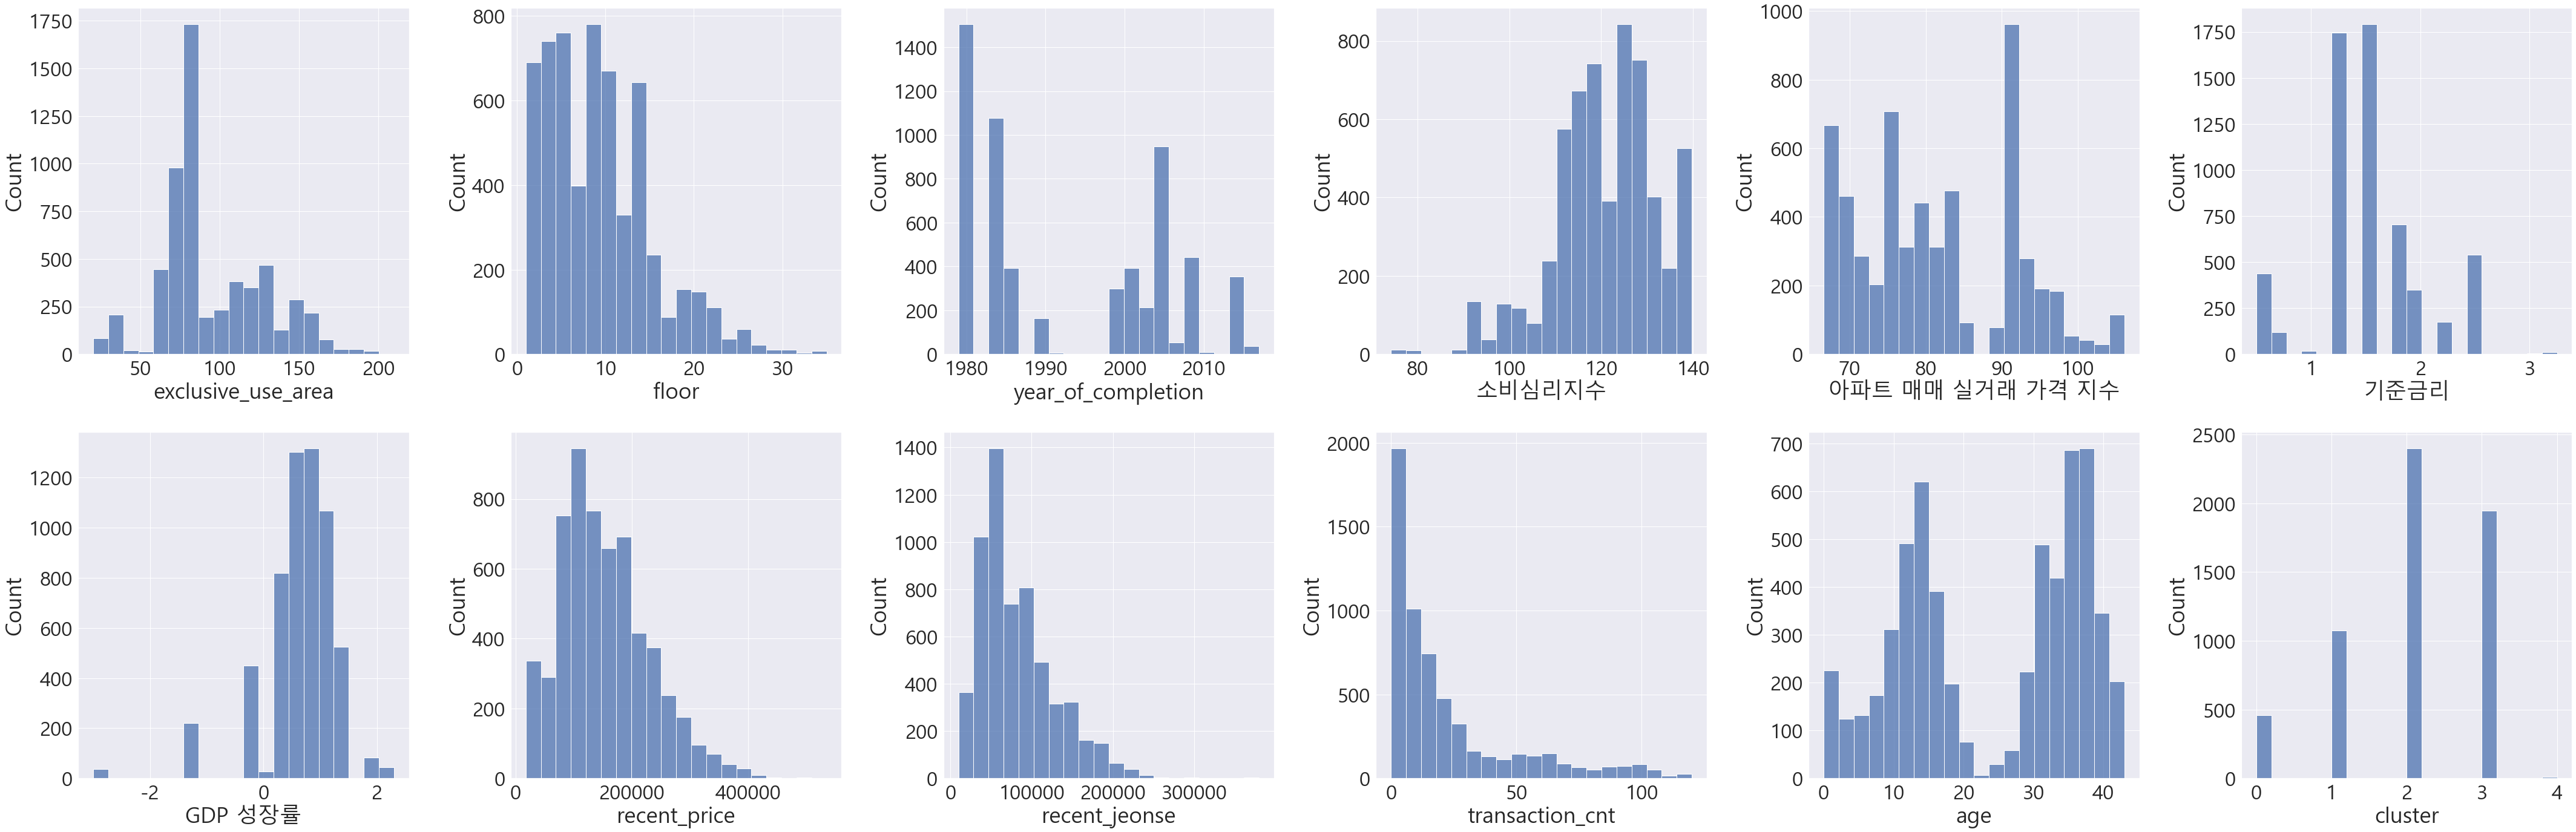

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 6, figsize=(60, 20))  

for idx, col in enumerate(col_lst):
    sns.histplot(data = train[col], bins= 20, ax=axs[idx//6][idx%6])

# 그래프 보여주기
plt.tight_layout()  # subplot 간 간격 조절
plt.show()

## 변수별 산점도
- 실거래가에 어떠한 영향을 미치는지 시각화

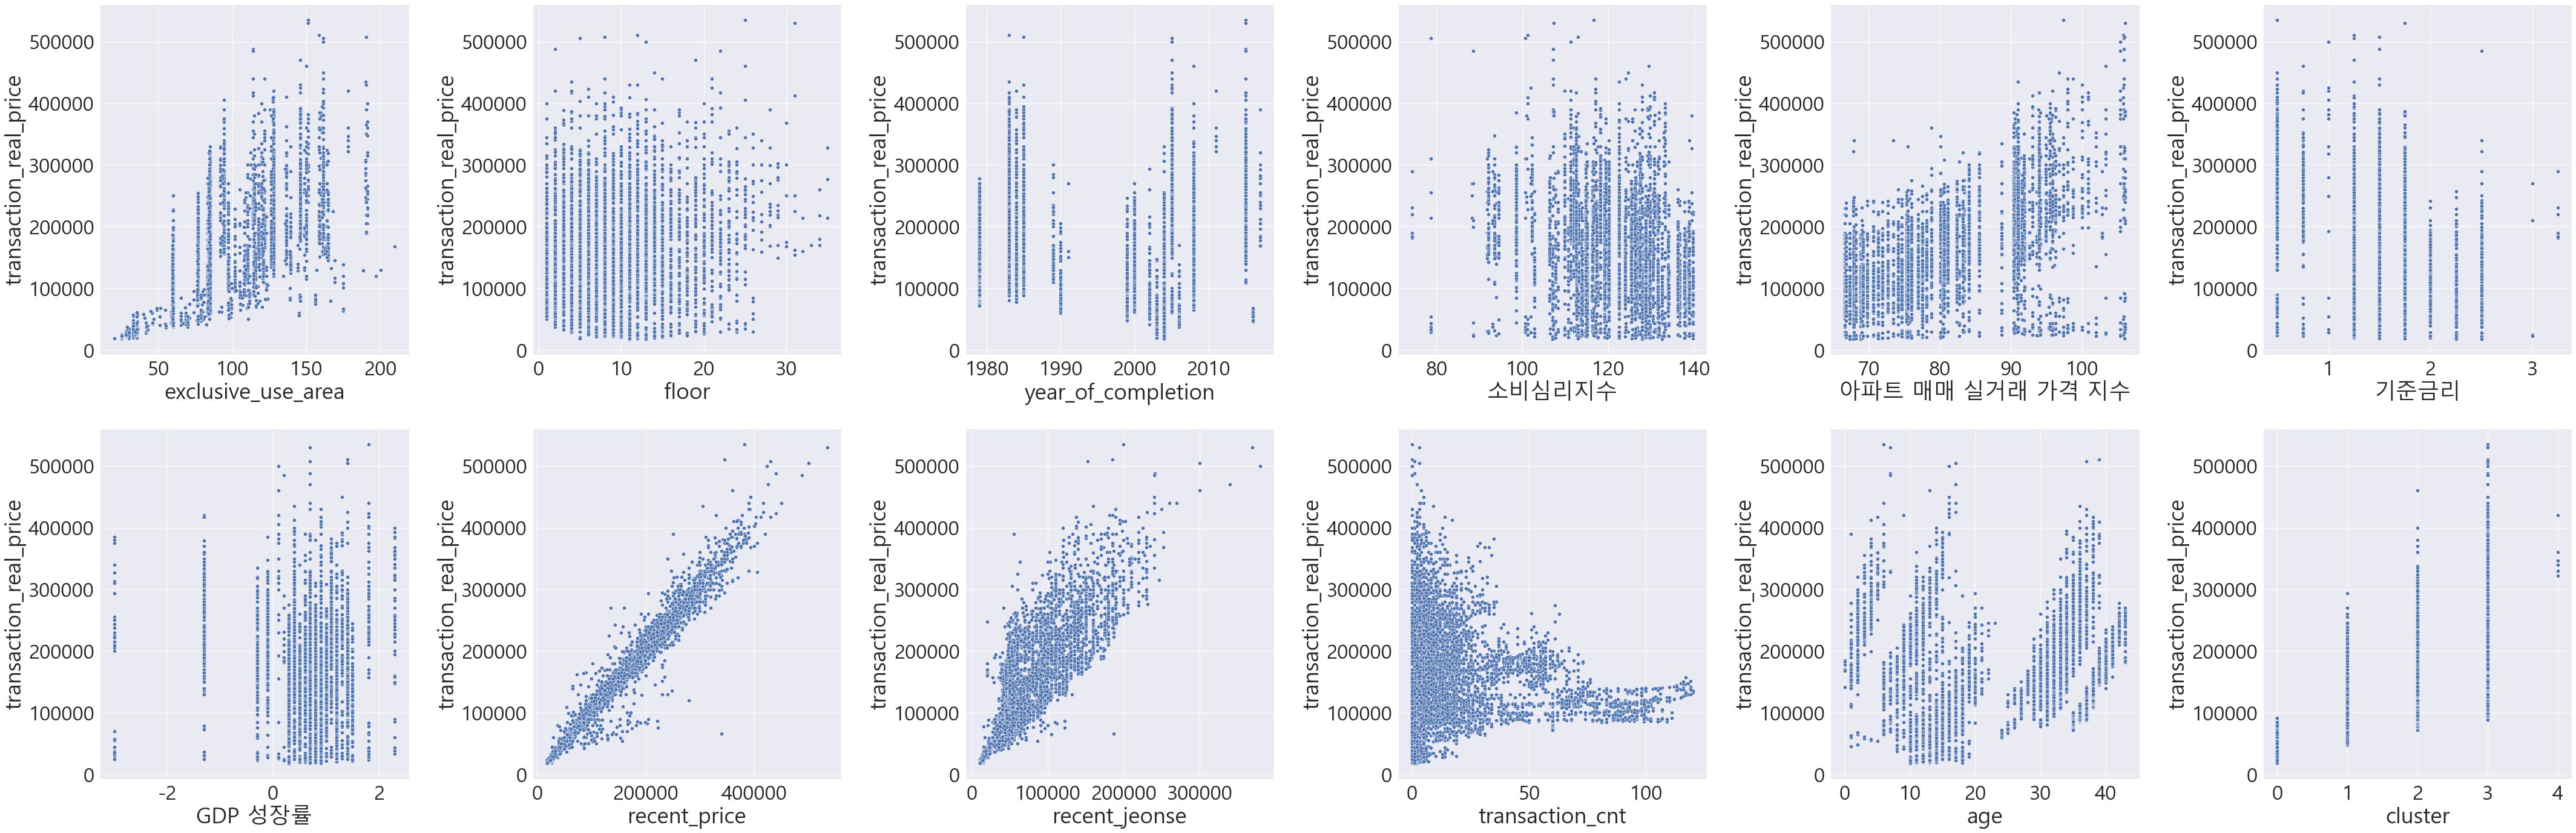

In [68]:
# 13개의 subplot을 위한 figure 생성
fig, axs = plt.subplots(2, 6, figsize=(60, 20))  

for idx, col in enumerate(col_lst):
        sns.scatterplot(data = train, x = col, y = 'transaction_real_price', ax=axs[idx//6][idx%6])


# 그래프 보여주기
plt.tight_layout()  # subplot 간 간격 조절
plt.show()

- 전용면적이 클수록 아파트 실거래가가 높은 경향

- 부동산소비심리지수가 낮을수록 거래가 저조한 경향<br>
=> 소비자들이 부동산 시장에 부정적 인식

- 기준금리가 높을수록 거래가 저조한 경향 <br>
=> 기준금리가 높을수록 대출 이자가 상승함<br>
같은 아파트 금리 비교해서 거래량 찾아보기<br>

- GDP 성장률이 높을수록 거래가 활발한 경향  
=> 같은 아파트 성장률 비교해서 찾아보기<br>

- 아파트 매매 실거래 가격지수가 높을수록 거래가 감소하는 경향
=> 특정 기간 동안의 아파트 거래 가격 변동을 나타냄. 높을수록 구매 의향이 줄어들어, 부동산 거래량이 줄어듬<br>

- 최근 전세와, 최근 매매 가격은 실거래가에 영향을 주는 양상으로 나타남

- 최근 실거래가와 전세가가 실제 실거래가와 크게 차이나는 데이터 찾아보기

- 4번 군집 특성 알아보기

In [69]:
data.describe()

,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,소비심리지수,아파트 매매 실거래 가격 지수,기준금리,GDP 성장률,apartment_id,recent_price,recent_jeonse,transaction_cnt,age,cluster
count,6089.000000,6089.000000,6089.000000,5893.000000,6089.000000,6089.000000,6089.000000,6089.000000,6089.000000,6089.000000,6089.000000,6089.000000,6089.000000,6089.000000,6089.000000,6089.000000
mean,96.011208,201716.390376,15.870422,155997.383845,9.198062,1992.597635,120.079323,81.867055,1.577106,0.634045,31.993595,157488.757267,82008.272803,21.331746,24.507637,1.998358
std,32.090360,232.717042,8.702851,78851.271771,5.909373,12.387630,11.968476,10.475038,0.598440,0.660920,19.075490,79912.371718,46778.952319,26.075562,12.636105,0.910227
min,20.370000,201401.000000,1.000000,18000.000000,1.000000,1979.000000,74.300000,66.600000,0.500000,-3.000000,0.000000,18000.000000,9900.000000,0.000000,0.000000,0.000000
25%,76.790000,201508.000000,8.000000,98500.000000,5.000000,1979.000000,113.100000,73.400000,1.250000,0.400000,16.000000,99500.000000,48000.000000,3.000000,13.000000,1.000000
50%,84.810000,201704.000000,16.000000,143000.000000,8.000000,1985.000000,120.100000,80.400000,1.500000,0.700000,33.000000,145000.000000,70000.000000,11.000000,30.000000,2.000000
75%,119.580000,201905.000000,23.000000,200000.000000,13.000000,2004.000000,128.800000,91.000000,1.750000,1.000000,46.000000,200500.000000,107250.000000,27.000000,36.000000,3.000000
max,209.790000,202306.000000,31.000000,535000.000000,35.000000,2021.000000,139.700000,106.100000,3.500000,2.300000,67.000000,535000.000000,380000.000000,120.000000,44.000000,4.000000


<strong><font size = '3'> 개별 데이터 비교 </strong>

- 6000여개의 데이터에서 은마아파트의 거래 데이터는 1500여개
- 은마아파트 데이터를 활용하여 지표에 따라 실거래가가 차이가 나는지 확인

In [70]:
enma = train[train['apt_name'] == '은마']
enma.head()

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,소비심리지수,아파트 매매 실거래 가격 지수,기준금리,GDP 성장률,apartment_id,recent_price,recent_jeonse,transaction_cnt,age,cluster
7,TRAIN_0529,서울특별시 강남구 대치동,316,은마,84.43,201401,5,89000.0,2,1979,train,2014-01-05,112.6,66.6,2.5,0.9,46,72600.0,40000.0,60.0,35,2.0
20,TRAIN_0530,서울특별시 강남구 대치동,316,은마,76.79,201401,8,77500.0,8,1979,train,2014-01-08,112.6,66.6,2.5,0.9,46,77500.0,35000.0,60.0,35,2.0
21,TRAIN_0531,서울특별시 강남구 대치동,316,은마,84.43,201401,9,90000.0,5,1979,train,2014-01-09,112.6,66.6,2.5,0.9,46,89000.0,37000.0,60.0,35,2.0
23,TRAIN_0532,서울특별시 강남구 대치동,316,은마,76.79,201401,9,74800.0,1,1979,train,2014-01-09,112.6,66.6,2.5,0.9,46,77500.0,40500.0,60.0,35,2.0
27,TRAIN_0533,서울특별시 강남구 대치동,316,은마,76.79,201401,10,77300.0,2,1979,train,2014-01-10,112.6,66.6,2.5,0.9,46,74800.0,32000.0,60.0,35,2.0


In [71]:
enma.columns

Index(['id', 'sigungu', 'jibun', 'apt_name', 'exclusive_use_area',
       'transaction_year_month', 'transaction_day', 'transaction_real_price',
       'floor', 'year_of_completion', 'train_test', 'transaction_date',
       '소비심리지수', '아파트 매매 실거래 가격 지수', '기준금리', 'GDP 성장률', 'apartment_id',
       'recent_price', 'recent_jeonse', 'transaction_cnt', 'age', 'cluster'],
      dtype='object')

In [72]:
# 부동산소비심리지수가 낮을수록 거래량이 저조한 경향이 있음
display(
    enma[enma['소비심리지수'] == enma['소비심리지수'].max()].sample(),
enma[enma['소비심리지수'] == enma['소비심리지수'].min()].sample()
       )

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,소비심리지수,아파트 매매 실거래 가격 지수,기준금리,GDP 성장률,apartment_id,recent_price,recent_jeonse,transaction_cnt,age,cluster
1250,TRAIN_1397,서울특별시 강남구 대치동,316,은마,84.43,201505,8,105000.0,11,1979,train,2015-05-08,139.7,71.3,1.75,0.8,46,102000.0,45000.0,100.0,36,2.0


,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,소비심리지수,아파트 매매 실거래 가격 지수,기준금리,GDP 성장률,apartment_id,recent_price,recent_jeonse,transaction_cnt,age,cluster
5886,TRAIN_5954,서울특별시 강남구 대치동,316,은마,76.79,202212,23,182500.0,14,1979,train,2022-12-23,74.3,102.8,3.25,0.2,46,190000.0,49000.0,7.0,43,2.0


In [73]:
# 기준금리가 높을수록 거래량이 저조한 경향이 있음
display(
    enma[enma['기준금리'] == enma['기준금리'].max()].sample(),
enma[enma['기준금리'] == enma['기준금리'].min()].sample()
       )

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,소비심리지수,아파트 매매 실거래 가격 지수,기준금리,GDP 성장률,apartment_id,recent_price,recent_jeonse,transaction_cnt,age,cluster
5885,TRAIN_5953,서울특별시 강남구 대치동,316,은마,76.79,202212,22,190000.0,12,1979,train,2022-12-22,74.3,102.8,3.25,0.2,46,189000.0,49000.0,6.0,43,2.0


,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,소비심리지수,아파트 매매 실거래 가격 지수,기준금리,GDP 성장률,apartment_id,recent_price,recent_jeonse,transaction_cnt,age,cluster
5703,TRAIN_5792,서울특별시 강남구 대치동,316,은마,76.79,202107,29,233000.0,7,1979,train,2021-07-29,127.9,100.0,0.5,0.9,46,227700.0,90000.0,24.0,42,2.0


In [74]:
# GDP 성장률이 낮을수록 거래가 활발함

display(
    enma[enma['GDP 성장률'] == enma['GDP 성장률'].max()].sample(),
enma[enma['GDP 성장률'] == enma['GDP 성장률'].min()].sample()
       )

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,소비심리지수,아파트 매매 실거래 가격 지수,기준금리,GDP 성장률,apartment_id,recent_price,recent_jeonse,transaction_cnt,age,cluster
5511,TRAIN_5536,서울특별시 강남구 대치동,316,은마,76.79,202012,19,215000.0,9,1979,train,2020-12-19,133.2,95.5,0.5,2.3,46,200000.0,85000.0,7.0,41,2.0


,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,소비심리지수,아파트 매매 실거래 가격 지수,기준금리,GDP 성장률,apartment_id,recent_price,recent_jeonse,transaction_cnt,age,cluster
5468,TRAIN_5526,서울특별시 강남구 대치동,316,은마,76.79,202009,16,208000.0,11,1979,train,2020-09-16,131.9,95.3,0.5,-3.0,46,210000.0,58000.0,25.0,41,2.0


In [75]:
enma[enma['아파트 매매 실거래 가격 지수'] == enma['아파트 매매 실거래 가격 지수'].min()]

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,소비심리지수,아파트 매매 실거래 가격 지수,기준금리,GDP 성장률,apartment_id,recent_price,recent_jeonse,transaction_cnt,age,cluster
7,TRAIN_0529,서울특별시 강남구 대치동,316,은마,84.43,201401,5,89000.0,2,1979,train,2014-01-05,112.6,66.6,2.5,0.9,46,72600.0,40000.0,60.0,35,2.0
20,TRAIN_0530,서울특별시 강남구 대치동,316,은마,76.79,201401,8,77500.0,8,1979,train,2014-01-08,112.6,66.6,2.5,0.9,46,77500.0,35000.0,60.0,35,2.0
21,TRAIN_0531,서울특별시 강남구 대치동,316,은마,84.43,201401,9,90000.0,5,1979,train,2014-01-09,112.6,66.6,2.5,0.9,46,89000.0,37000.0,60.0,35,2.0
23,TRAIN_0532,서울특별시 강남구 대치동,316,은마,76.79,201401,9,74800.0,1,1979,train,2014-01-09,112.6,66.6,2.5,0.9,46,77500.0,40500.0,60.0,35,2.0
27,TRAIN_0533,서울특별시 강남구 대치동,316,은마,76.79,201401,10,77300.0,2,1979,train,2014-01-10,112.6,66.6,2.5,0.9,46,74800.0,32000.0,60.0,35,2.0
28,TRAIN_0534,서울특별시 강남구 대치동,316,은마,76.79,201401,10,80000.0,6,1979,train,2014-01-10,112.6,66.6,2.5,0.9,46,74800.0,32000.0,60.0,35,2.0
31,TRAIN_0535,서울특별시 강남구 대치동,316,은마,76.79,201401,11,79500.0,14,1979,train,2014-01-11,112.6,66.6,2.5,0.9,46,80000.0,32000.0,60.0,35,2.0
32,TRAIN_0536,서울특별시 강남구 대치동,316,은마,84.43,201401,11,94500.0,5,1979,train,2014-01-11,112.6,66.6,2.5,0.9,46,90000.0,42000.0,60.0,35,2.0
42,TRAIN_0537,서울특별시 강남구 대치동,316,은마,76.79,201401,12,82000.0,8,1979,train,2014-01-12,112.6,66.6,2.5,0.9,46,79500.0,33000.0,60.0,35,2.0
43,TRAIN_0538,서울특별시 강남구 대치동,316,은마,76.79,201401,13,83000.0,11,1979,train,2014-01-13,112.6,66.6,2.5,0.9,46,82000.0,33000.0,60.0,35,2.0


In [76]:
 
train[train['cluster'] == 4.0]

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,소비심리지수,아파트 매매 실거래 가격 지수,기준금리,GDP 성장률,apartment_id,recent_price,recent_jeonse,transaction_cnt,age,cluster
312,TRAIN_0427,서울특별시 강남구 대치동,1009-4,상지리츠빌카일룸(1009-4),178.17,201404,18,340000.0,15,2011,train,2014-04-18,117.1,67.9,2.50,0.9,31,340000.0,187000.0,0.0,3,4.0
417,TRAIN_0428,서울특별시 강남구 대치동,1009-4,상지리츠빌카일룸(1009-4),178.17,201406,24,322138.0,14,2011,train,2014-06-24,113.6,67.8,2.50,0.9,31,340000.0,187000.0,1.0,3,4.0
1537,TRAIN_1196,서울특별시 강남구 대치동,1009-4,상지리츠빌카일룸(1009-4),178.17,201508,31,340000.0,13,2011,train,2015-08-31,138.9,73.4,1.50,0.5,31,322138.0,177175.9,0.0,4,4.0
1791,TRAIN_2213,서울특별시 강남구 대치동,1009-4,상지리츠빌카일룸(1009-4),178.17,201602,1,330000.0,12,2011,train,2016-02-01,128.7,75.5,1.50,0.7,31,340000.0,187000.0,0.0,5,4.0
1792,TRAIN_2213,서울특별시 강남구 대치동,1009-4,상지리츠빌카일룸(1009-4),178.17,201602,1,330000.0,12,2011,train,2016-02-01,117.6,75.5,1.50,0.7,31,340000.0,187000.0,0.0,5,4.0
2715,TRAIN_2214,서울특별시 강남구 대치동,1009-4,상지리츠빌카일룸(1009-4),178.17,201610,25,360000.0,2,2011,train,2016-10-25,127.4,78.8,1.25,0.4,31,330000.0,181500.0,0.0,5,4.0
2907,TRAIN_3336,서울특별시 강남구 대치동,1009-4,상지리츠빌카일룸(1009-4),178.17,201703,3,347000.0,8,2011,train,2017-03-03,113.1,80.1,1.25,0.6,31,360000.0,198000.0,0.0,6,4.0
2972,TRAIN_3337,서울특별시 강남구 대치동,1009-4,상지리츠빌카일룸(1009-4),178.17,201703,29,330000.0,4,2011,train,2017-03-29,113.1,80.1,1.25,0.6,31,347000.0,190850.0,1.0,6,4.0
5234,TRAIN_5409,서울특별시 강남구 대치동,1009-4,상지리츠빌카일룸(1009-4),178.17,202004,16,420000.0,2,2011,train,2020-04-16,109.8,95.8,0.75,-1.3,31,330000.0,181500.0,0.0,9,4.0


In [77]:
train['exclusive_use_area'].max()

209.79

In [78]:
train[train['apt_name'] == '동부센트레빌'] 

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,소비심리지수,아파트 매매 실거래 가격 지수,기준금리,GDP 성장률,apartment_id,recent_price,recent_jeonse,transaction_cnt,age,cluster
0,TRAIN_0320,서울특별시 강남구 대치동,670,동부센트레빌,145.83,201401,2,180000.0,16,2005,train,2014-01-02,112.6,66.6,2.50,0.9,20,180000.0,99000.0,25.0,9,3.0
9,TRAIN_0321,서울특별시 강남구 대치동,670,동부센트레빌,161.47,201401,6,230000.0,6,2005,train,2014-01-06,112.6,66.6,2.50,0.9,20,155000.0,85250.0,25.0,9,3.0
64,TRAIN_0322,서울특별시 강남구 대치동,670,동부센트레빌,145.83,201401,18,180000.0,23,2005,train,2014-01-18,112.6,66.6,2.50,0.9,20,180000.0,130000.0,25.0,9,3.0
67,TRAIN_0323,서울특별시 강남구 대치동,670,동부센트레빌,145.83,201401,19,181000.0,11,2005,train,2014-01-19,112.6,66.6,2.50,0.9,20,180000.0,130000.0,25.0,9,3.0
73,TRAIN_0324,서울특별시 강남구 대치동,670,동부센트레빌,145.83,201401,21,189500.0,24,2005,train,2014-01-21,112.6,66.6,2.50,0.9,20,181000.0,130000.0,25.0,9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,TRAIN_5896,서울특별시 강남구 대치동,670,동부센트레빌,145.83,202201,7,425000.0,21,2005,train,2022-01-07,102.0,105.8,1.00,1.4,20,417000.0,231000.0,2.0,17,3.0
5796,TRAIN_5897,서울특별시 강남구 대치동,670,동부센트레빌,161.47,202202,14,505000.0,5,2005,train,2022-02-14,100.7,105.9,1.25,1.4,20,500000.0,300000.0,3.0,17,3.0
5797,TRAIN_5897,서울특별시 강남구 대치동,670,동부센트레빌,161.47,202202,14,505000.0,5,2005,train,2022-02-14,78.7,105.9,1.25,1.4,20,500000.0,300000.0,3.0,17,3.0
5815,TRAIN_5898,서울특별시 강남구 대치동,670,동부센트레빌,145.83,202204,9,470000.0,19,2005,train,2022-04-09,107.1,105.9,1.25,0.7,20,425000.0,340000.0,2.0,17,3.0


# 전처리

## 이상치
- 사분위수 범위 방식으로 이상치를 제거함

In [79]:
data['year'] = data['transaction_year_month'] // 100

In [80]:
train = data[data['train_test'] == 'train']

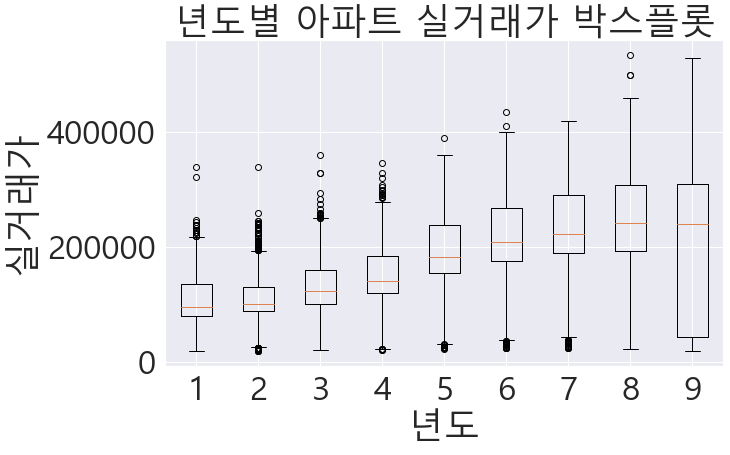

In [81]:
plt.figure(figsize=(10, 6))
plt.boxplot([train['transaction_real_price'][train['year'] == y] for y in train['year'].unique()]) 
plt.title('년도별 아파트 실거래가 박스플롯')
plt.xlabel('년도')
plt.ylabel('실거래가')
plt.show()

In [82]:
q1=train['transaction_real_price'].quantile(0.25)
q2=train['transaction_real_price'].quantile(0.5)
q3=train['transaction_real_price'].quantile(0.75)
iqr=q3-q1
iqr

101500.0

In [83]:
condition= (train['transaction_real_price']>q3+1.5*iqr) | (train['transaction_real_price']<q1-1.5*iqr)
display(train[condition])

print(f"사분위값 이상치 개수 :  {train[condition].shape[0] }")

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,소비심리지수,아파트 매매 실거래 가격 지수,기준금리,GDP 성장률,apartment_id,recent_price,recent_jeonse,transaction_cnt,age,cluster,year
2715,TRAIN_2214,서울특별시 강남구 대치동,1009-4,상지리츠빌카일룸(1009-4),178.1700,201610,25,360000.0,2,2011,train,2016-10-25,127.4,78.8,1.25,0.4,31,330000.0,181500.0,0.0,5,4.0,2016
4312,TRAIN_4400,서울특별시 강남구 대치동,511,한보미도맨션1,191.0700,201808,27,360000.0,5,1983,train,2018-08-27,111.9,91.1,1.50,0.7,60,320000.0,120000.0,11.0,35,3.0,2018
4385,TRAIN_4115,서울특별시 강남구 대치동,1027,래미안대치팰리스,151.3100,201810,18,355500.0,23,2015,train,2018-10-18,126.2,93.9,1.50,0.6,22,327500.0,228000.0,19.0,3,3.0,2018
4393,TRAIN_3966,서울특별시 강남구 대치동,1029,대치SKVIEW,125.3512,201810,31,390000.0,14,2017,train,2018-10-31,126.2,93.9,1.50,0.6,5,250000.0,55000.0,5.0,1,3.0,2018
4632,TRAIN_4477,서울특별시 강남구 대치동,500,개포우성2,159.6000,201906,17,385000.0,10,1984,train,2019-06-17,98.6,90.4,1.75,-0.1,1,311000.0,140000.0,6.0,35,3.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5856,TRAIN_5979,서울특별시 강남구 대치동,511,한보미도맨션1,128.0100,202206,24,387000.0,4,1983,train,2022-06-24,107.3,106.1,1.75,0.7,60,383000.0,150000.0,3.0,39,3.0,2022
5857,TRAIN_5903,서울특별시 강남구 대치동,1027,래미안대치팰리스,151.3100,202206,30,530000.0,31,2015,train,2022-06-30,107.3,106.1,1.75,0.7,22,535000.0,370000.0,3.0,7,3.0,2022
5859,TRAIN_5891,서울특별시 강남구 대치동,888,대치아이파크,114.9700,202207,7,380000.0,6,2008,train,2022-07-07,100.9,106.1,1.75,0.8,10,315000.0,199500.0,0.0,14,2.0,2022
5863,TRAIN_5985,서울특별시 강남구 대치동,511,한보미도맨션2,126.3300,202207,12,380000.0,7,1985,train,2022-07-12,100.9,106.1,1.75,0.8,61,380000.0,120750.0,4.0,37,3.0,2022


사분위값 이상치 개수 :  114


- 최근 실거래가와 전세가가 실제 실거래가와 크게 차이나는 값 찾아보기
- 실제 실거래가 데이터를 확인해본 결과 데이터 오류로 인한 이상치임을 확인함 => 데이터 제거

In [84]:
train_outlier1 = train.loc[ (train['recent_price'] /  train['transaction_real_price'] )  > 1.5]
print(f"이상치 개수 :  {train_outlier1.shape[0]}")
train_outlier1.sample(10)

이상치 개수 :  65


,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,소비심리지수,아파트 매매 실거래 가격 지수,기준금리,GDP 성장률,apartment_id,recent_price,recent_jeonse,transaction_cnt,age,cluster,year
190,TRAIN_0103,서울특별시 강남구 대치동,891-28,대치동우정에쉐르1,79.07,201402,18,47500.0,7,2004,train,2014-02-18,129.5,66.8,2.50,0.9,6,85000.0,46750.0,4.0,10,0.0,2014
800,TRAIN_1587,서울특별시 강남구 대치동,910-5,풍림아이원1차103동(910-5),83.65,201501,1,63500.0,7,2003,train,2015-01-01,114.0,69.0,2.00,0.5,52,100000.0,55000.0,0.0,12,1.0,2015
298,TRAIN_0480,서울특별시 강남구 대치동,890-54,선릉역풍림아이원레몬,76.73,201404,7,42900.0,2,2006,train,2014-04-07,117.1,67.9,2.50,0.9,36,87000.0,47850.0,1.0,8,0.0,2014
247,TRAIN_0693,서울특별시 강남구 대치동,910-4,풍림아이원아파트,145.96,201403,3,80000.0,7,2003,train,2014-03-03,132.6,67.3,2.50,0.9,57,182000.0,100100.0,1.0,11,1.0,2014
3390,TRAIN_3817,서울특별시 강남구 대치동,986-14,하이캐슬,156.92,201706,30,129500.0,11,2008,train,2017-06-30,126.2,81.1,1.25,1.0,58,240000.0,132000.0,0.0,9,1.0,2017
4414,TRAIN_5117,서울특별시 강남구 대치동,934-1,청원,84.90,201901,12,86000.0,4,2005,train,2019-01-12,93.9,93.6,1.75,0.6,48,185000.0,55000.0,0.0,14,1.0,2019
2891,TRAIN_3807,서울특별시 강남구 대치동,910-3,풍림아이원1차101동(910-3),145.96,201702,26,87000.0,7,2003,train,2017-02-26,119.7,80.1,1.25,0.6,51,222000.0,122100.0,0.0,14,1.0,2017
3731,TRAIN_3936,서울특별시 강남구 대치동,950-5,화인하이빌,84.34,201710,25,59000.0,5,2004,train,2017-10-25,117.3,83.2,1.25,1.4,67,153500.0,53000.0,0.0,13,0.0,2017
2222,TRAIN_2335,서울특별시 강남구 대치동,950,우정에쉐르,84.93,201606,4,65000.0,1,2004,train,2016-06-04,126.4,76.0,1.50,0.3,44,146000.0,35000.0,1.0,12,1.0,2016
1066,TRAIN_1292,서울특별시 강남구 대치동,950,우정에쉐르,97.85,201503,16,54500.0,1,2004,train,2015-03-16,136.6,69.8,1.75,0.5,44,106000.0,48000.0,0.0,11,1.0,2015


In [85]:
train = train.drop(train_outlier1.index)

train.shape


(5828, 23)

<strong><font size = 4> 최근 전세와 실제 실거래값 비교 </strong>

- 오기입된 실거래 제거 이후 이상치 전세 데이터도 삭제됨

<strong><font size = 4> 최근 전세와 실제 실거래값 비교 </strong>

- 오기입된 실거래 제거 이후 이상치 전세 데이터도 삭제됨

In [86]:
train.loc[ (train['recent_jeonse'] /  train['transaction_real_price'] )  > 1.5]

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,소비심리지수,아파트 매매 실거래 가격 지수,기준금리,GDP 성장률,apartment_id,recent_price,recent_jeonse,transaction_cnt,age,cluster,year


## 원핫인코딩
- 군집에 대해 원-핫 인코딩 변환
- 레이블 인코딩의 경우, 순서로 이해하고 처리할 확률이 높기 때문에 원-핫 인코딩 사용


In [87]:
data = pd.get_dummies(data, columns = ['cluster'])

In [88]:
data.columns

Index(['id', 'sigungu', 'jibun', 'apt_name', 'exclusive_use_area',
       'transaction_year_month', 'transaction_day', 'transaction_real_price',
       'floor', 'year_of_completion', 'train_test', 'transaction_date',
       '소비심리지수', '아파트 매매 실거래 가격 지수', '기준금리', 'GDP 성장률', 'apartment_id',
       'recent_price', 'recent_jeonse', 'transaction_cnt', 'age', 'year',
       'cluster_0.0', 'cluster_1.0', 'cluster_2.0', 'cluster_3.0',
       'cluster_4.0'],
      dtype='object')

In [89]:
data.iloc[1]

id                           TRAIN_0699
sigungu                   서울특별시 강남구 대치동
jibun                            986-14
apt_name                           하이캐슬
exclusive_use_area                84.06
transaction_year_month           201401
transaction_day                       2
transaction_real_price            68000
floor                                 5
year_of_completion                 2008
train_test                        train
transaction_date             2014-01-02
소비심리지수                            112.6
아파트 매매 실거래 가격 지수                   66.6
기준금리                                2.5
GDP 성장률                             0.9
apartment_id                         58
recent_price                      68000
recent_jeonse                     37400
transaction_cnt                       1
age                                   6
year                               2014
cluster_0.0                           0
cluster_1.0                           1
cluster_2.0                           0


In [90]:
data.to_csv('../data/indicator.csv',index = False)

## 왜도 

- 왜도의 절대값이 1 이상인 데이터는, 데이터가 한쪽으로 치우쳐져있음
- 로그 변환 처리 필요

In [91]:
data.skew()

exclusive_use_area         0.477550
transaction_year_month     0.640362
transaction_day           -0.021980
transaction_real_price     0.802793
floor                      0.901079
year_of_completion         0.304293
소비심리지수                    -0.748586
아파트 매매 실거래 가격 지수           0.308295
기준금리                       0.985014
GDP 성장률                   -1.719182
apartment_id              -0.081076
recent_price               0.829290
recent_jeonse              1.170041
transaction_cnt            1.711269
age                       -0.236575
year                       0.646028
cluster_0.0                3.152032
cluster_1.0                1.666293
cluster_2.0                0.367787
cluster_3.0                0.718024
cluster_4.0               25.959373
dtype: float64

In [92]:
data.columns

Index(['id', 'sigungu', 'jibun', 'apt_name', 'exclusive_use_area',
       'transaction_year_month', 'transaction_day', 'transaction_real_price',
       'floor', 'year_of_completion', 'train_test', 'transaction_date',
       '소비심리지수', '아파트 매매 실거래 가격 지수', '기준금리', 'GDP 성장률', 'apartment_id',
       'recent_price', 'recent_jeonse', 'transaction_cnt', 'age', 'year',
       'cluster_0.0', 'cluster_1.0', 'cluster_2.0', 'cluster_3.0',
       'cluster_4.0'],
      dtype='object')

In [93]:
data['use_area'] = data['exclusive_use_area']

In [103]:
col = ['exclusive_use_area', 'transaction_real_price',
       'floor', 'year_of_completion',
       '소비심리지수', '아파트 매매 실거래 가격 지수', '기준금리', 'GDP 성장률',
       'recent_price', 'recent_jeonse', 'age', 'transaction_cnt']

In [104]:
skewness = data[col].apply(lambda x: x.skew()).sort_values(ascending=False)
skewness

transaction_cnt           1.711269
recent_jeonse             1.170041
기준금리                      0.985014
floor                     0.901079
recent_price              0.829290
transaction_real_price    0.802793
exclusive_use_area        0.477550
아파트 매매 실거래 가격 지수          0.308295
year_of_completion        0.304293
age                      -0.236575
소비심리지수                   -0.748586
GDP 성장률                  -1.719182
dtype: float64

In [105]:
skew_feats = skewness[(skewness>0.9)|(skewness<-0.9)].index
# 경제성장률은 로그변환 이후 더 치우쳐짐
skew_feats = skew_feats.drop('GDP 성장률')

<strong><font size = '4'> 로그변환</strong>
- 거래량, 최근 전세, 아파트 매매 실거래 가격 지수, 기준금리, 층 변수 로그변환 진행

In [106]:
log_data = data.copy()
log_data[skew_feats] = np.log1p(log_data[skew_feats])

In [107]:
log_data[skew_feats].skew()

transaction_cnt   -0.161405
recent_jeonse     -0.468303
기준금리              -0.028083
floor             -0.490655
dtype: float64

- GDP 성장률에 음수 값이 존재해 따로 처리했으나, 로그변환  이후 분포의 치우쳐짐이 심해 로그변환 처리 안함

In [108]:
#log_data['GDP 성장률'] = np.log1p(log_data['GDP 성장률'] - log_data['GDP 성장률'].min() + 1)

In [109]:
#skew_feats = skew_feats.insert(0,'GDP 성장률')

In [110]:
#skew_feats

In [111]:
# GDP 컬럼은 로그 변환 이후 정규분포에서 더 멀어짐. gdp 성장률 로그변환 제외
#log_data[skew_feats].skew()

GDP 성장률           -3.218245

In [131]:
sns.set(font_scale = 1.5)
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

<strong><font size = '4'> 로그변환 전 분포</strong>

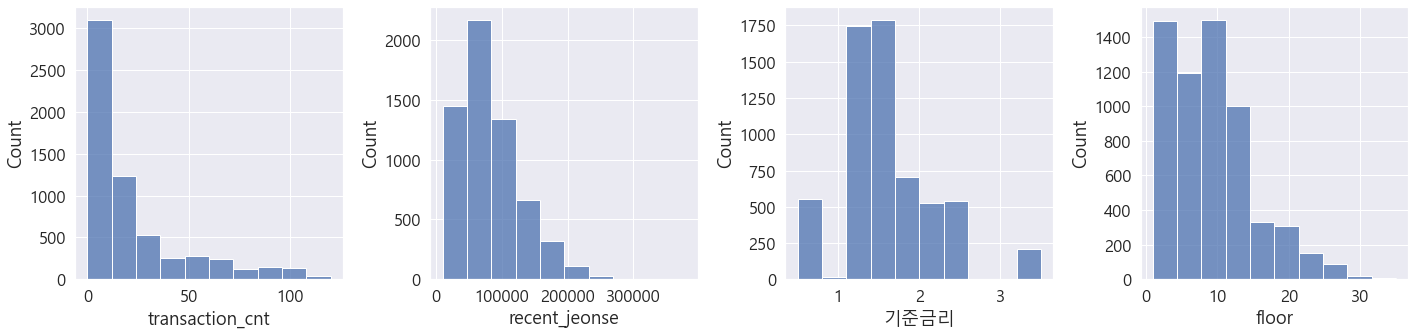

In [132]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  

for idx, c in enumerate(skew_feats):
    sns.histplot(data = data[c], bins= 10, ax=axs[idx])

# 그래프 보여주기
plt.tight_layout()  # subplot 간 간격 조절
plt.show()

<strong><font size = '4'> 로그변환 후 분포 </strong>
- 치우쳐졌던 분포가 로그변환 이 후 정규분포에 가까워짐
    
    

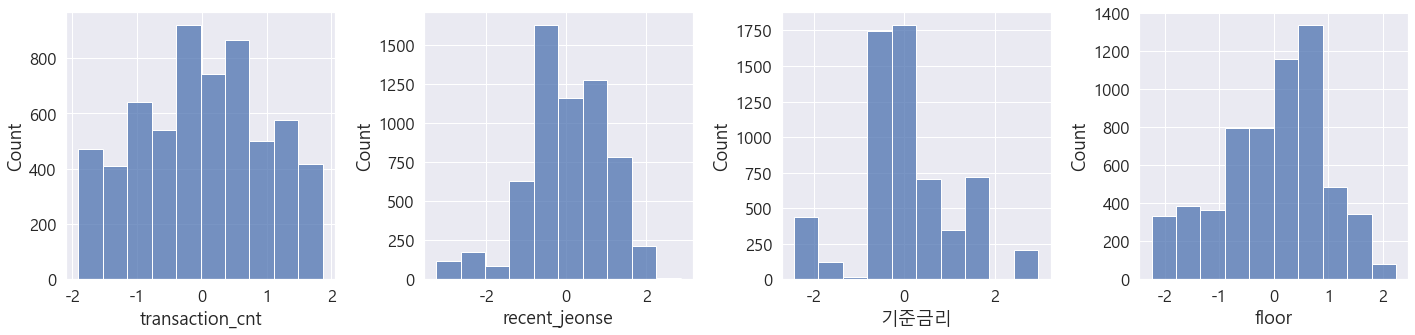

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 4, figsize=(20, 5))  

for idx, c in enumerate(skew_feats):
    sns.histplot(data = log_data[c], bins= 10, ax=axs[idx])

# 그래프 보여주기
plt.tight_layout()  # subplot 간 간격 조절
plt.show()

In [114]:
log_data['transaction_year'] = log_data['transaction_year_month'] // 100
log_data['transaction_year']

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
6084    2023
6085    2023
6086    2023
6087    2023
6088    2023
Name: transaction_year, Length: 6089, dtype: int64

In [115]:
# GDP 성장률 로그변환 확인
log_data['GDP 성장률'].iloc[0] 

0.9

<strong><font size = '4'> 로그변환 데이터 저장</strong>

In [116]:
log_data.to_csv('../data/log_data.csv',index =  False)

# 스케일링
- 컬럼별로 범위의 차이가 존재해 표준화를 진행함
- 부스팅 계열 모델은 스케일링에 크게 영향을 받지 않으나, 후에 이어질 회귀분석을 고려하여 스케일링 진행
- 카테고리 성격이 짙은 아파트 아이디나 군집, 재건축 변수와 날짜 관련 변수는 빼고 진행함

## 표준화

In [149]:
sns.set(font_scale = 3)
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [117]:
log_data.columns

Index(['id', 'sigungu', 'jibun', 'apt_name', 'exclusive_use_area',
       'transaction_year_month', 'transaction_day', 'transaction_real_price',
       'floor', 'year_of_completion', 'train_test', 'transaction_date',
       '소비심리지수', '아파트 매매 실거래 가격 지수', '기준금리', 'GDP 성장률', 'apartment_id',
       'recent_price', 'recent_jeonse', 'transaction_cnt', 'age', 'year',
       'cluster_0.0', 'cluster_1.0', 'cluster_2.0', 'cluster_3.0',
       'cluster_4.0', 'use_area', 'transaction_year'],
      dtype='object')

In [136]:
log_data = pd.read_csv('../data/log_data.csv')

In [144]:
std_col = ['exclusive_use_area','floor',
       '소비심리지수', '아파트 매매 실거래 가격 지수', '기준금리', 'GDP 성장률', 
       'recent_price', 'recent_jeonse', 'age', 'transaction_cnt']

In [151]:
log_train = log_data[log_data['train_test'] == 'train']
log_test = log_data[log_data['train_test'] == 'test']

<strong><font size = '4'> 스케일링 전 분포 </strong>

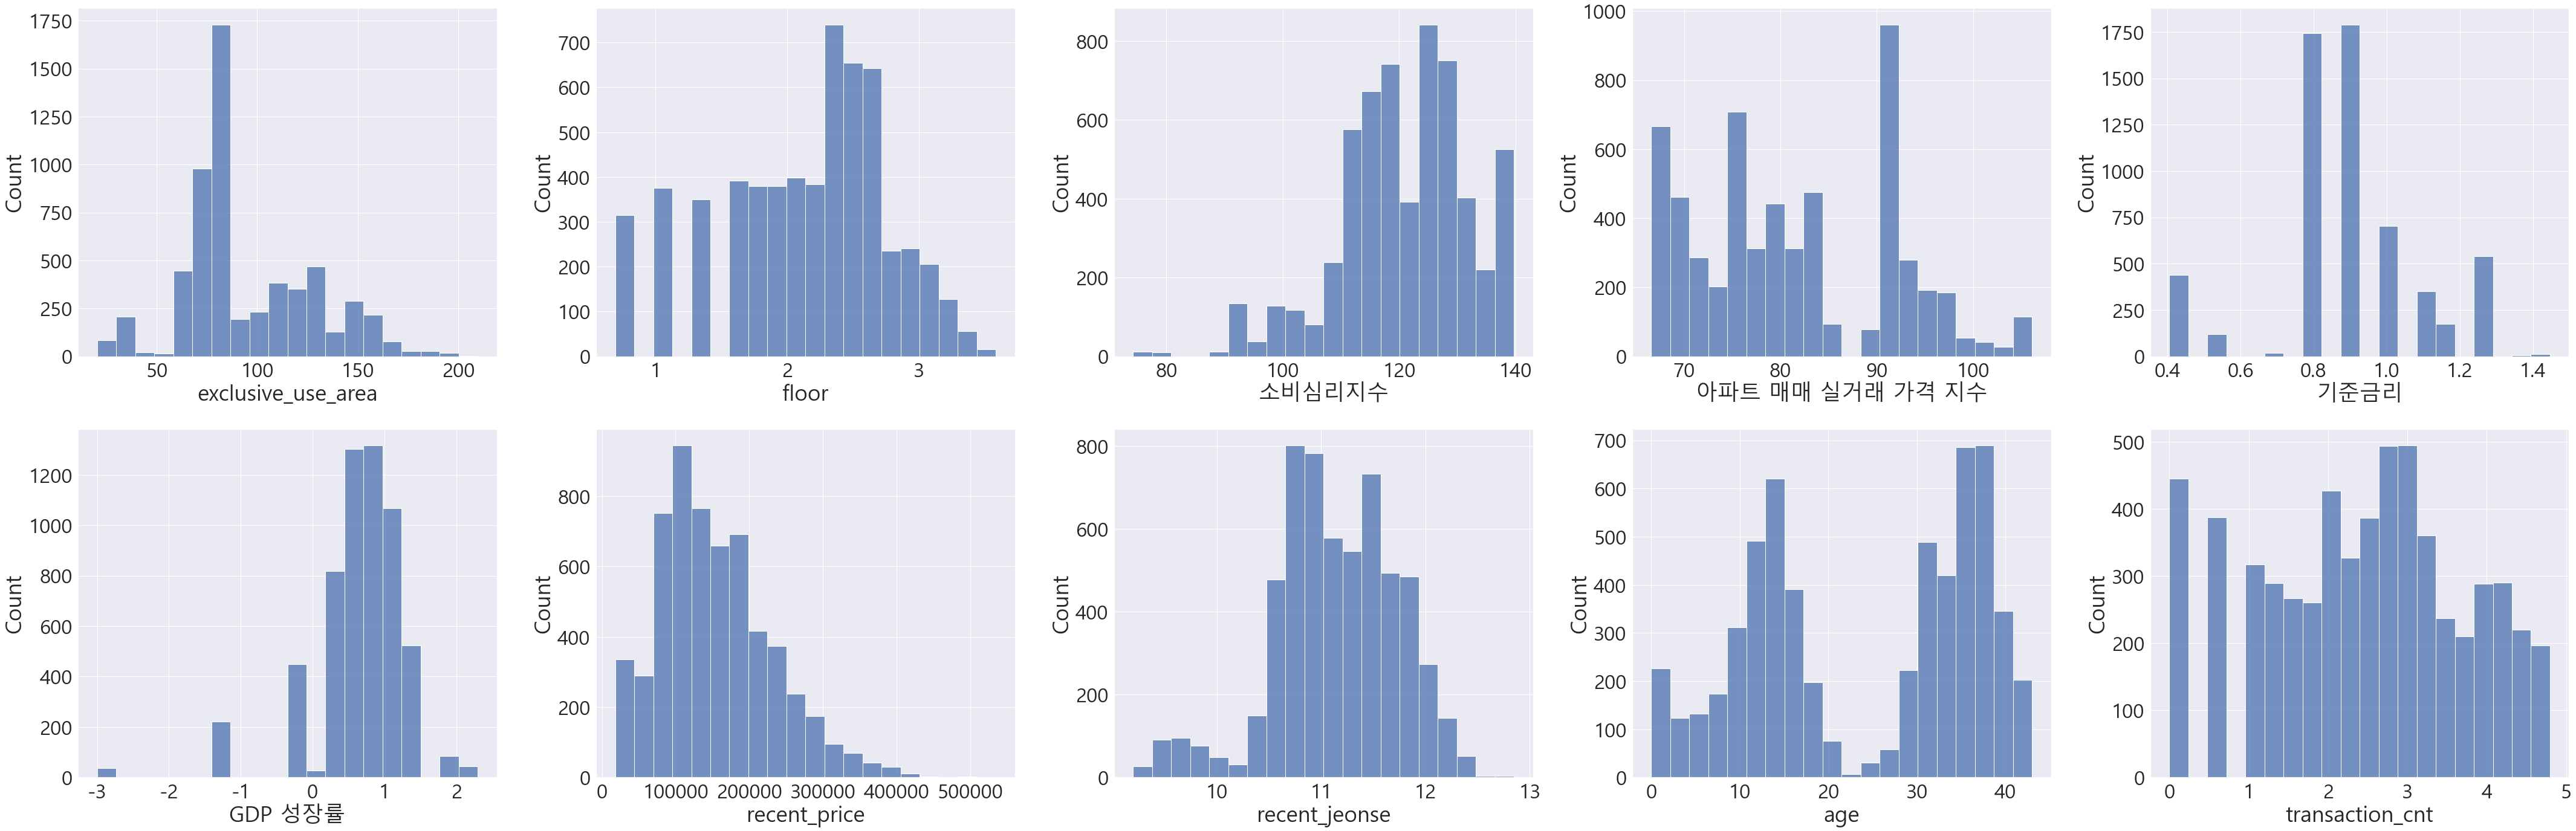

In [152]:
fig, axs = plt.subplots(2, 5, figsize=(60, 20))  

for idx, col in enumerate(std_col):
    sns.histplot(data = log_train[col], bins= 20, ax=axs[idx//5][idx%5])

# 그래프 보여주기
plt.tight_layout()  # subplot 간 간격 조절
plt.show()

In [121]:
from sklearn.preprocessing import StandardScaler

In [153]:
scaler = StandardScaler()
log_train[std_col] = scaler.fit_transform(log_train[std_col])
log_test[std_col] = scaler.transform(log_test[std_col])

In [154]:
log_data = pd.concat([log_train, log_test], axis = 0)
log_data.head()

,id,sigungu,jibun,apt_name,exclusive_use_area,transaction_year_month,transaction_day,transaction_real_price,floor,year_of_completion,train_test,transaction_date,소비심리지수,아파트 매매 실거래 가격 지수,기준금리,GDP 성장률,apartment_id,recent_price,recent_jeonse,transaction_cnt,age,year,cluster_0.0,cluster_1.0,cluster_2.0,cluster_3.0,cluster_4.0,use_area,transaction_year
0,TRAIN_0320,서울특별시 강남구 대치동,670,동부센트레빌,1.548708,201401,2,180000.0,1.076907,2005,train,2014-01-02,-0.746912,-1.447313,1.72633,0.373928,20,0.341030,0.602706,0.656715,-1.213313,2014,0,0,0,1,0,145.83,2014
1,TRAIN_0699,서울특별시 강남구 대치동,986-14,하이캐슬,-0.373779,201401,2,68000.0,-0.537322,2008,train,2014-01-02,-0.746912,-1.447313,1.72633,0.373928,58,-1.128319,-1.028158,-1.362428,-1.452688,2014,0,1,0,0,0,84.06,2014
2,TRAIN_0705,서울특별시 강남구 대치동,511,한보미도맨션1,2.032053,201401,4,155000.0,-0.537322,1983,train,2014-01-04,-0.746912,-1.447313,1.72633,0.373928,60,0.013050,0.352187,0.625840,0.542104,2014,0,0,0,1,0,161.36,2014
3,TRAIN_0660,서울특별시 강남구 대치동,891-6,테헤란로대우아이빌(891-6),-1.959512,201401,4,27000.0,1.404432,2004,train,2014-01-04,-0.746912,-1.447313,1.72633,0.373928,49,-1.666205,-2.575584,-0.376246,-1.133521,2014,1,0,0,0,0,33.11,2014
4,TRAIN_0102,서울특별시 강남구 대치동,891-28,대치동우정에쉐르1,-1.123229,201401,4,37400.0,-0.298392,2004,train,2014-01-04,-0.746912,-1.447313,1.72633,0.373928,6,-1.529766,-2.029722,-0.641119,-1.133521,2014,1,0,0,0,0,59.98,2014


<strong><font size = '4'> 스케일링 후 분포 </strong>

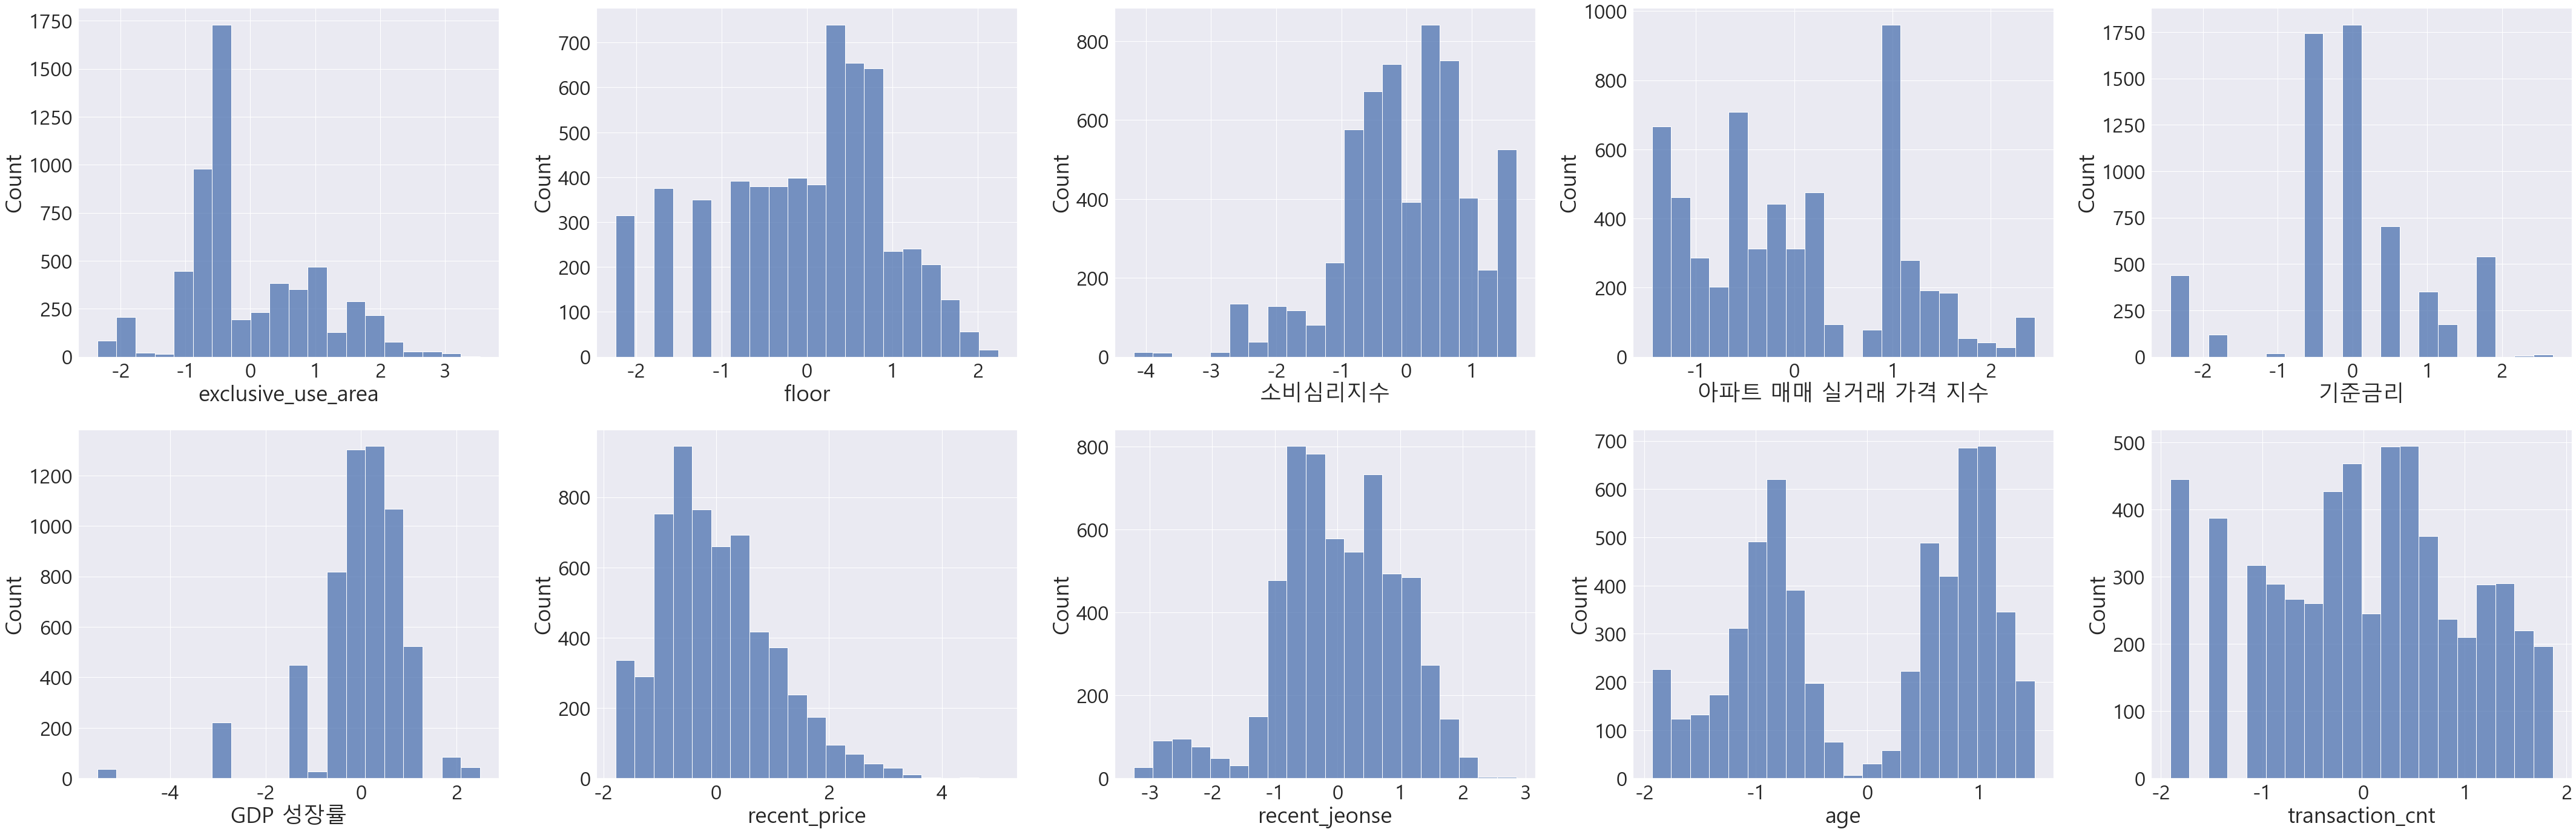

In [155]:
fig, axs = plt.subplots(2, 5, figsize=(60, 20))  

for idx, col in enumerate(std_col):
    sns.histplot(data = log_train[col], bins= 20, ax=axs[idx//5][idx%5])

# 그래프 보여주기
plt.tight_layout()  # subplot 간 간격 조절
plt.show()

In [125]:
#use_area = log_data['use_area_price'].iloc[0]
real_price = log_data['transaction_real_price'].iloc[0]

In [126]:
real_price

180000.0

<strong><font size = '4'> 표준화 데이터 저장</strong>

In [127]:
log_data.to_csv('../data/log_std_data.csv',index =  False)